In [2]:
# TRY OUT:
# 1. DIFFERENT EPOCHS
# 2. DIFFERENT NUMBER OF LAYERS
# 3. DIFFERENT OPTIMIZERS
# 4. DIFFERENT BATCH SIZES
# 5. DIFFERENT TIME STEPS

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# reading data
stock = pd.read_csv("../data/aapl.us.txt")

In [5]:
stock.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


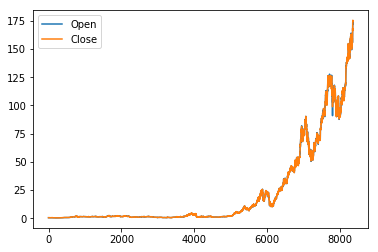

In [6]:
# Plotting out open, high, low
plt.figure()
plt.plot(stock['Open'])
plt.plot(stock['Close'])
plt.legend(['Open', 'Close'], loc = 'upper left')

In [7]:
# Let us try to predict using the opening price
data = stock.iloc[:,1:2]

In [8]:
data.head()

,Open
0,0.42388
1,0.42388
2,0.42516
3,0.42902
4,0.43927


In [9]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [10]:
scaled

array([[0.00109122],
       [0.00109122],
       [0.00109854],
       ...,
       [0.99382423],
       [0.99639747],
       [1.        ]])

In [11]:
scaled.shape

(8364, 1)

In [12]:
# Do a train test split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(scaled, train_size = 0.8, test_size = 0.2, shuffle = False)

In [13]:
df_train.shape

(6691, 1)

In [14]:
df_test.shape

(1673, 1)

In [15]:
# Hyper parameters
TIME_STEPS = 60
BATCH_SIZE = 100
lr = 0.00010000 # learning rate
EPOCHS = 25

In [16]:
# Creating windows
x_train = [] # This list contain the sequences to predict when training
y_train = [] # This list contain the next value of the sequences when training

for i in range(TIME_STEPS, df_train.shape[0]):
    x_train.append(df_train[i-TIME_STEPS:i,0].tolist()) # ,0 used in order to return the values only
    y_train.append(df_train[i,0].tolist()) # tolist() converts np array to simple array

In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [18]:
x_train

array([[0.00109122, 0.00109122, 0.00109854, ..., 0.00103278, 0.00103278,
        0.00098858],
       [0.00109122, 0.00109854, 0.00112062, ..., 0.00103278, 0.00098858,
        0.00092282],
       [0.00109854, 0.00112062, 0.00117923, ..., 0.00098858, 0.00092282,
        0.00093746],
       ...,
       [0.235268  , 0.23618865, 0.23665755, ..., 0.24898622, 0.24899193,
        0.24540084],
       [0.23618865, 0.23665755, 0.23534234, ..., 0.24899193, 0.24540084,
        0.24536653],
       [0.23665755, 0.23534234, 0.23734374, ..., 0.24540084, 0.24536653,
        0.24481757]])

In [19]:
x_train.shape

(6631, 60)

In [20]:
y_train.shape

(6631,)

In [21]:
# Trim the dataset to fit the batch size
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by the batch size
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [22]:
x_train = trim_dataset(x_train, BATCH_SIZE)
y_train = trim_dataset(y_train, BATCH_SIZE)

In [23]:
x_train.shape

(6600, 60)

In [24]:
y_train.shape

(6600,)

In [25]:
# Reshaping it to include the 1 feature
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [26]:
x_train.shape

(6600, 60, 1)

In [27]:
# Now we create the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers

Using TensorFlow backend.


In [ ]:
model = Sequential()

model.add(LSTM(50, input_shape = (TIME_STEPS, x_train.shape[2]), return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

optimizer = optimizers.RMSprop(lr=lr)
model.compile(optimizer = optimizer, loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
6600/6600 [==============================] - 39s 6ms/step - loss: 0.0013
Epoch 2/25
6600/6600 [==============================] - 31s 5ms/step - loss: 7.2128e-05
Epoch 3/25
6600/6600 [==============================] - 32s 5ms/step - loss: 5.6856e-05
Epoch 4/25
6600/6600 [==============================] - 34s 5ms/step - loss: 6.0212e-05
Epoch 5/25
6600/6600 [==============================] - 40s 6ms/step - loss: 5.2208e-05
Epoch 6/25
6600/6600 [==============================] - 43s 7ms/step - loss: 5.0455e-05
Epoch 7/25
6600/6600 [==============================] - 32s 5ms/step - loss: 4.6112e-05
Epoch 8/25
6600/6600 [==============================] - 32s 5ms/step - loss: 4.3400e-05
Epoch 9/25
6600/6600 [==============================] - 32s 5ms/step - loss: 4.8645e-

In [ ]:
##### Preparing test and validation sets
df_test.shape

In [ ]:
df_test = trim_dataset(df_test, BATCH_SIZE)

In [ ]:
df_test.shape

In [ ]:
# x_test will be the first half, which we will try to predict the 2nd half
# we will then check this with x_val

df_testing, df_val = np.split(df_test, 2)

In [ ]:
# df_testing.shape

In [ ]:
# df_val.shape

In [ ]:
#### Checking accuracy of model

In [ ]:
# Normalizing data
scaled_df_testing = scaler.fit_transform(df_testing)

In [ ]:
# Reshaping x_test for the LSTM
x_test = []

for i in range(TIME_STEPS, df_testing.shape[0]):
    x_test.append(scaled_df_testing[i-TIME_STEPS:i,0].tolist())

In [ ]:
x_test = np.array(x_test)

In [ ]:
# x_test.shape

In [ ]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# x_test.shape

In [ ]:
# Predicting data using testing data
predicted_stock_price = model.predict(x_test)

# Converting back from normalized data
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [ ]:
len(predicted_stock_price)

In [ ]:
len(df_testing)

In [ ]:
# Plotting results
plt.figure()
plt.plot(df_testing[TIME_STEPS:])
plt.plot(predicted_stock_price)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(['Real Price', 'Predicted Price'])
plt.show

In [ ]:
# Calculating error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_testing[TIME_STEPS:], predicted_stock_price)
mse / (df_testing[TIME_STEPS:]).mean() * 100

In [ ]:
# Evaluating model
# model.evaluate(x_testing, df_val[:-50])

In [ ]:
# Prediction model 1 based on George V Jose
def predict(data, num_prediction):
    # Scaling data
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)

    # Looking at last TIME_STEPS value
    prediction_list = scaled[-TIME_STEPS:]
    
    for _ in range(num_prediction):
        # Looking at last TIME_STEPS value (1 of our batch)
        x = prediction_list[-TIME_STEPS:]
        x = np.array(x)
        
        # 1 batch with TIME_STEPS and 1 feature
        x = x.reshape((1, TIME_STEPS, 1))
        
        # prediction
        output = model.predict(x)[0][0]
        
        # Appends prediction results back into 
        prediction_list = np.append(prediction_list, output)
        
    prediction_list = prediction_list[TIME_STEPS - 1:]
    
    # Reverse the scaling
    prediction_list = prediction_list.reshape(num_prediction+1, 1)
    prediction_list = scaler.inverse_transform(prediction_list)
    
    return prediction_list

In [ ]:
results1 = predict(df_testing[:-20], 20)

In [ ]:
# Plotting results
plt.figure()
plt.plot(df_val[:20])
plt.plot(results1)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(['Real Price', 'Predicted Price'])
plt.show

In [ ]:
# Prediction model 2 based on Ravindra Compella
def moving_test_window_preds(data, num_predictions):
    prediction_list = []
    moving_test_window = data[-TIME_STEPS:]
    moving_test_window = np.array(moving_test_window)
    
    # Scaling data
    scaler = MinMaxScaler()
    moving_test_window = scaler.fit_transform(moving_test_window)
    
    # Reshaping data
    moving_test_window = moving_test_window.reshape((1, TIME_STEPS, 1))
    
    for i in range(num_predictions):
        preds_one_step = model.predict(moving_test_window)
        prediction_list.append(preds_one_step[0,0])
        preds_one_step = preds_one_step.reshape(1,1,1)
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1)
        
    prediction_list = np.array(prediction_list)
    prediction_list = prediction_list.reshape(num_predictions, 1)
    prediction_list = scaler.inverse_transform(prediction_list)
    
    return prediction_list

In [ ]:
results2 = moving_test_window_preds(df_testing[:-20], 20)

In [ ]:
# Plotting results
plt.figure()
plt.plot(df_val[:20])
plt.plot(results2)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(['Real Price', 'Predicted Price'])
plt.show